In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_sets_lqr = "/home/mostovea/6g-projects/InvertedPendulum/src/build/results/5g-2a/lqr-all-dn/"

data_sets_pid = "/home/mostovea/6g-projects/InvertedPendulum/src/build/results/5g-2a/pid-all-dn/"

data_sets_pid_angle = "/home/mostovea/6g-projects/InvertedPendulum/src/build/results/5g-2a/pid-angle-dn/"

data_sets_lqr_angle = "/home/mostovea/6g-projects/InvertedPendulum/src/build/results/5g-2a/lqr-angle-dn/"


In [ ]:
def stable_time(df_delay, threshold=0.00872665, window_duration=5.0):
    t = df_delay['t'].values
    angle = np.abs(df_delay['phi'].values)
    is_stable = angle < threshold
    n = len(t)
    start_idx = 0
    end_idx = 0

    while start_idx < n:
        while end_idx < n and t[end_idx] - t[start_idx] < window_duration:
            end_idx += 1
        
        if end_idx == n:
            break

        if is_stable[start_idx:end_idx].all():
            return t[start_idx]

        start_idx += 1

    return float("inf")

In [3]:
def median(data_sets, t):
    phi_medians = []
    phi_mse = []
    for filename in os.listdir(data_sets):
        if filename.endswith(".csv"):
            filepath = os.path.join(data_sets, filename)
            df = pd.read_csv(filepath, names= ['t', 'position', 'vx', 'phi', 'omega'], header=None, skiprows=1)
            df = df[df["t"] <= t]
            if "phi" in df.columns:
                
                df["phi_deg"] = np.degrees(df["phi"])
                print(filename)
                print("Maximaler phi_deg-Wert:", df["phi_deg"].max())
                print(f"Stabilization time: {stable_time(df):.6f}")
                median_phi = df["phi_deg"].median()
                phi_mse.append((df["phi_deg"]**2).mean())
                phi_medians.append(median_phi)
    phi_medians_sorted = np.sort(phi_medians)

    # 99% Confidence interval
    confidence_level = 0.99
    n = len(phi_medians_sorted )
    
    z = 1.288  # z-value for  99 % CI
    lower_idx = max(0, int(np.floor(0.5 * n - z * np.sqrt(n))))
    upper_idx = min(n - 1, int(np.ceil(0.5 * n + z * np.sqrt(n))))
    
    ci_lower = phi_medians_sorted[lower_idx]
    ci_upper = phi_medians_sorted[upper_idx]
    median = np.median(phi_medians_sorted )
    df = pd.DataFrame(phi_medians_sorted, columns=["medians"])
    summary = df["medians"].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])
    print(summary)
    print(f"99% Confidence Interval for Median phy: [{ci_lower:.6f}, {ci_upper:.6f}]")
    
    return phi_medians_sorted, phi_mse

In [4]:
t = 60

In [5]:
phi_medians_lqr, phi_mse_lqr = median(data_sets_lqr, t)

lqr-all-dn-12.csv
Maximaler phi_deg-Wert: 20.635418766313677
lqr-all-dn-6.csv
Maximaler phi_deg-Wert: 20.659597585268198
lqr-all-dn-29.csv
Maximaler phi_deg-Wert: 20.634616625400493
lqr-all-dn-13.csv
Maximaler phi_deg-Wert: 20.637653301714685
lqr-all-dn-18.csv
Maximaler phi_deg-Wert: 20.641320231603526
lqr-all-dn-16.csv
Maximaler phi_deg-Wert: 20.651690767695392
lqr-all-dn-7.csv
Maximaler phi_deg-Wert: 20.62436068086765
lqr-all-dn-8.csv
Maximaler phi_deg-Wert: 20.629230822126264
lqr-all-dn-23.csv
Maximaler phi_deg-Wert: 20.64217966829622
lqr-all-dn-19.csv
Maximaler phi_deg-Wert: 20.633012343574126
lqr-all-dn-27.csv
Maximaler phi_deg-Wert: 20.630491329275554
lqr-all-dn-0.csv
Maximaler phi_deg-Wert: 20.65627443005644
lqr-all-dn-10.csv
Maximaler phi_deg-Wert: 20.631981019542895
lqr-all-dn-28.csv
Maximaler phi_deg-Wert: 20.64183589361914
lqr-all-dn-11.csv
Maximaler phi_deg-Wert: 20.650201077428054
lqr-all-dn-3.csv
Maximaler phi_deg-Wert: 20.635590653652216
lqr-all-dn-26.csv
Maximaler phi_d

In [6]:
phi_medians_pid, phi_mse_pid = median(data_sets_pid, t)

pid-all-dn-28.csv
Maximaler phi_deg-Wert: 20.366243194161218
pid-all-dn-27.csv
Maximaler phi_deg-Wert: 20.06796136601611
pid-all-dn-3.csv
Maximaler phi_deg-Wert: 20.063434999434577
pid-all-dn-7.csv
Maximaler phi_deg-Wert: 29.887254763188643
pid-all-dn-13.csv
Maximaler phi_deg-Wert: 20.066127901071688
pid-all-dn-4.csv
Maximaler phi_deg-Wert: 20.38171305462975
pid-all-dn-15.csv
Maximaler phi_deg-Wert: 20.37890556143361
pid-all-dn-24.csv
Maximaler phi_deg-Wert: 20.11311044027242
pid-all-dn-2.csv
Maximaler phi_deg-Wert: 20.07076885921225
pid-all-dn-25.csv
Maximaler phi_deg-Wert: 25.841313292872336
pid-all-dn-9.csv
Maximaler phi_deg-Wert: 20.304707526964165
pid-all-dn-18.csv
Maximaler phi_deg-Wert: 20.073633648187908
pid-all-dn-22.csv
Maximaler phi_deg-Wert: 20.352148432401
pid-all-dn-1.csv
Maximaler phi_deg-Wert: 20.07947781769824
pid-all-dn-20.csv
Maximaler phi_deg-Wert: 20.0670446335439
pid-all-dn-10.csv
Maximaler phi_deg-Wert: 20.062518266962368
pid-all-dn-6.csv
Maximaler phi_deg-Wert: 

In [7]:
phi_medians_pid_angle, phi_mse_pid_angle = median(data_sets_pid_angle, t)

pid-angle-dn-17.csv
Maximaler phi_deg-Wert: 20.080394550170446
pid-angle-dn-20.csv
Maximaler phi_deg-Wert: 20.066987337764388
pid-angle-dn-29.csv
Maximaler phi_deg-Wert: 20.066987337764388
pid-angle-dn-21.csv
Maximaler phi_deg-Wert: 20.071628295904947
pid-angle-dn-5.csv
Maximaler phi_deg-Wert: 20.066987337764388
pid-angle-dn-0.csv
Maximaler phi_deg-Wert: 20.079420521918724
pid-angle-dn-1.csv
Maximaler phi_deg-Wert: 20.079420521918724
pid-angle-dn-19.csv
Maximaler phi_deg-Wert: 20.067904070236594
pid-angle-dn-27.csv
Maximaler phi_deg-Wert: 20.067904070236594
pid-angle-dn-11.csv
Maximaler phi_deg-Wert: 20.265803692674783
pid-angle-dn-14.csv
Maximaler phi_deg-Wert: 20.319776316976107
pid-angle-dn-9.csv
Maximaler phi_deg-Wert: 20.199627067337172
pid-angle-dn-16.csv
Maximaler phi_deg-Wert: 20.253828874756547
pid-angle-dn-8.csv
Maximaler phi_deg-Wert: 20.06332040787555
pid-angle-dn-15.csv
Maximaler phi_deg-Wert: 20.250734902662842
pid-angle-dn-3.csv
Maximaler phi_deg-Wert: 20.06332040787555


In [8]:
phi_medians_lqr_angle, phi_mse_lqr_angle = median(data_sets_lqr_angle, t)

lqr-angle-dn-7.csv
Maximaler phi_deg-Wert: 20.07518063423476
lqr-angle-dn-6.csv
Maximaler phi_deg-Wert: 20.09529145284385
lqr-angle-dn-25.csv
Maximaler phi_deg-Wert: 20.07947781769824
lqr-angle-dn-21.csv
Maximaler phi_deg-Wert: 20.086066832342244
lqr-angle-dn-15.csv
Maximaler phi_deg-Wert: 20.088301367743256
lqr-angle-dn-28.csv
Maximaler phi_deg-Wert: 20.08600953656273
lqr-angle-dn-27.csv
Maximaler phi_deg-Wert: 20.081597761540223
lqr-angle-dn-17.csv
Maximaler phi_deg-Wert: 20.09643736843411
lqr-angle-dn-29.csv
Maximaler phi_deg-Wert: 20.080509141729472
lqr-angle-dn-2.csv
Maximaler phi_deg-Wert: 20.084920916751983
lqr-angle-dn-26.csv
Maximaler phi_deg-Wert: 20.08383229694123
lqr-angle-dn-16.csv
Maximaler phi_deg-Wert: 20.089447283333516
lqr-angle-dn-10.csv
Maximaler phi_deg-Wert: 20.075066042675733
lqr-angle-dn-23.csv
Maximaler phi_deg-Wert: 20.086066832342244
lqr-angle-dn-13.csv
Maximaler phi_deg-Wert: 20.079420521918724
lqr-angle-dn-0.csv
Maximaler phi_deg-Wert: 20.095348748623362
lq

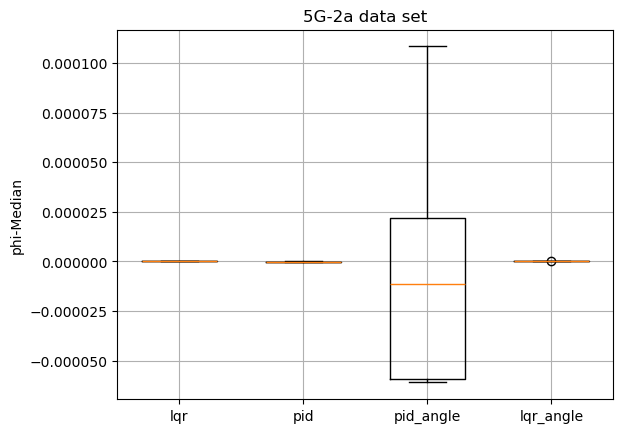

In [9]:
data = [phi_medians_lqr, phi_medians_pid, phi_medians_pid_angle, phi_medians_lqr_angle]

plt.boxplot(data, positions=[1, 2, 3,4,], widths=0.6)
plt.xticks([1, 2,3 ,4], ['lqr', 'pid', 'pid_angle', 'lqr_angle'])
plt.title("5G-2a data set")
plt.ylabel("phi-Median")
plt.grid(True)


plt.savefig('5G-2a_plotbox.png', dpi=300)
plt.show()

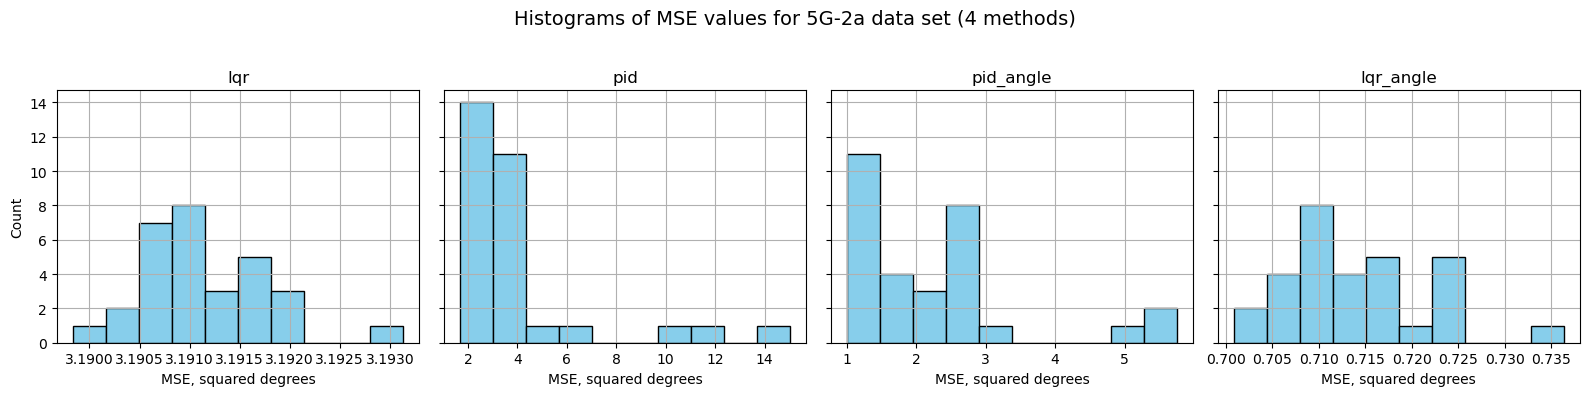

In [11]:
mse_dict = {
    'lqr': phi_mse_lqr,
    'pid': phi_mse_pid,
    'pid_angle': phi_mse_pid_angle,
    'lqr_angle': phi_mse_lqr_angle,
}

# Plot Setup
fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

for i, (label, data) in enumerate(mse_dict.items()):
    axs[i].hist(data, bins=10, color='skyblue', edgecolor='black')
    axs[i].set_title(label)
    axs[i].set_xlabel('MSE, squared degrees')
    axs[i].grid(True)

axs[0].set_ylabel('Count')
plt.suptitle('Histograms of MSE values for 5G-2a data set (4 methods)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig('5g_2a_mse_hist.png', dpi=300)
plt.show()